In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from itertools import product, combinations
import matplotlib.pyplot as plt

from voting.profile_optimized import *

#import voting methods
from voting.voting_methods_for_optimized import *
from voting.voting_methods_split_cycle import *

# display winners of a voting method
def display_winners(vm, prof):
    print  "{} winners: {}".format(vm.__doc__, "{" + ", ".join([prof.cname(_) for _ in vm(prof)]) + "}")

import glob
election_data_directory = './election-data/'


In [3]:
# read the file containing election data and return a profile
def read_election_data(fname):
    with open(fname, 'r') as fp:
        line = fp.readline()
        num_cands = int(line)
        remaining_lines = fp.readlines()
        num_rankings = remaining_lines[num_cands]
        rankings = remaining_lines[num_cands + 1:]
        anon_prof = {}
        for r in rankings:
            _ranking = r.split(',')
            num = _ranking[0]
            anon_prof.update({tuple([int(_.strip()) for _ in _ranking[1:num_cands+1]]): int(num)})
        aprof = create_profile_opt_from_anon_profile(anon_prof, 
                                                     candidate_names=range(1,num_cands+1), 
                                                     cmap={c+1:str(c+1) for c in range(num_cands)})
    return aprof



In [4]:

num_mult_winners = {"sc": 0,
                    "smith": 0,
                    "bp":  0, 
                    "copeland": 0}

winner_set_sizes = {"sc": list(),
                    "smith": list(),
                    "bp": list(),
                    "copeland": list()}

num_profiles = 0
for fname in glob.glob(election_data_directory + "/*.soc"):
    num_profiles += 1
    print "\n" 

    with open(fname, 'r') as fp:
        line = fp.readline()
        num_cands = int(line)
    
    print "Number of candidates: ", num_cands
    prof = read_election_data(fname)
    print "Number of voters: ", len(prof.voter_names)
    sc_winners = splitcycle_faster(prof)
    bp_winners = beatpath_faster(prof)
    smith_winners = getcha(prof)
    copeland_winners = copeland(prof)
    
    print "\tSplit Cycle winners {}".format(sc_winners)
    print "\tBeat Path winners {}".format(bp_winners)
    print "\tCopeland winners {}".format(copeland_winners)
    print "\tGETCHA winners {}".format(smith_winners)
    print "\n"
    if len(sc_winners) > 1:
        num_mult_winners['sc'] += 1
        winner_set_sizes['sc'].append(len(sc_winners))
    if len(bp_winners) > 1:
        num_mult_winners['bp'] += 1
        winner_set_sizes['bp'].append(len(bp_winners))
    if len(smith_winners) > 1:
        num_mult_winners['smith'] += 1
        winner_set_sizes['smith'].append(len(smith_winners))
    if len(copeland_winners) > 1:
        num_mult_winners['copeland'] += 1
        winner_set_sizes['copeland'].append(len(copeland_winners))

print "Analyzed {} different elections.".format(num_profiles)
print "done."               



Number of candidates:  30
Number of voters:  7
	Split Cycle winners [24]
	Beat Path winners [24]
	Copeland winners [24]
	GETCHA winners [24]




Number of candidates:  4
Number of voters:  362
	Split Cycle winners [1]
	Beat Path winners [1]
	Copeland winners [1]
	GETCHA winners [1]




Number of candidates:  4
Number of voters:  1256
	Split Cycle winners [3]
	Beat Path winners [3]
	Copeland winners [3]
	GETCHA winners [3]




Number of candidates:  4
Number of voters:  369
	Split Cycle winners [3]
	Beat Path winners [3]
	Copeland winners [3]
	GETCHA winners [3]




Number of candidates:  32
Number of voters:  4
	Split Cycle winners [0]
	Beat Path winners [0]
	Copeland winners [0]
	GETCHA winners [0]




Number of candidates:  60
Number of voters:  4
	Split Cycle winners [0]
	Beat Path winners [0]
	Copeland winners [0]
	GETCHA winners [0]




Number of candidates:  131
Number of voters:  4
	Split Cycle winners [0, 92]
	Beat Path winners [0, 92]
	Copeland winners [0]
	GETCHA winners [0

	Split Cycle winners [0]
	Beat Path winners [0]
	Copeland winners [0]
	GETCHA winners [0]




Number of candidates:  32
Number of voters:  4
	Split Cycle winners [0, 7]
	Beat Path winners [0, 7]
	Copeland winners [7]
	GETCHA winners [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]




Number of candidates:  41
Number of voters:  4
	Split Cycle winners [1, 6]
	Beat Path winners [1, 6]
	Copeland winners [1]
	GETCHA winners [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]




Number of candidates:  3
Number of voters:  367
	Split Cycle winners [0]
	Beat Path winners [0]
	Copeland winners [0]
	GETCHA winners [0]




Number of candidates:  3
Number of voters:  547
	Split Cycle winners [0]
	Beat Path winners [0]
	Copeland winners [0]
	GETCHA winners [0]




Number of candidates:  3
Number of voters:  563
	Split Cycle w

	Split Cycle winners [0]
	Beat Path winners [0]
	Copeland winners [0]
	GETCHA winners [0]




Number of candidates:  68
Number of voters:  4
	Split Cycle winners [0, 7, 8]
	Beat Path winners [0, 7, 8]
	Copeland winners [7, 8]
	GETCHA winners [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]




Number of candidates:  96
Number of voters:  4
	Split Cycle winners [0, 2]
	Beat Path winners [0, 2]
	Copeland winners [0]
	GETCHA winners [0, 1, 2]




Number of candidates:  115
Number of voters:  4
	Split Cycle winners [0, 2]
	Beat Path winners [0, 2]
	Copeland winners [2]
	GETCHA winners [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,

	Split Cycle winners [0, 9]
	Beat Path winners [0, 9]
	Copeland winners [0, 9]
	GETCHA winners [0, 9]




Number of candidates:  240
Number of voters:  5
	Split Cycle winners [0]
	Beat Path winners [0]
	Copeland winners [0]
	GETCHA winners [0]




Number of candidates:  3
Number of voters:  542
	Split Cycle winners [2]
	Beat Path winners [2]
	Copeland winners [2]
	GETCHA winners [2]




Number of candidates:  3
Number of voters:  501
	Split Cycle winners [1]
	Beat Path winners [1]
	Copeland winners [1]
	GETCHA winners [1]




Number of candidates:  3
Number of voters:  467
	Split Cycle winners [2]
	Beat Path winners [2]
	Copeland winners [2]
	GETCHA winners [2]




Number of candidates:  3
Number of voters:  360
	Split Cycle winners [2]
	Beat Path winners [2]
	Copeland winners [2]
	GETCHA winners [2]




Number of candidates:  4
Number of voters:  795
	Split Cycle winners [0]
	Beat Path winners [0]
	Copeland winners [0]
	GETCHA winners [0]




Number of candidates:  242
Number of voter

	Split Cycle winners [0, 1, 4, 7, 44]
	Beat Path winners [0, 1, 4, 7, 44]
	Copeland winners [1, 2]
	GETCHA winners [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,

	Split Cycle winners [0]
	Beat Path winners [0]
	Copeland winners [0]
	GETCHA winners [0]




Number of candidates:  20
Number of voters:  4
	Split Cycle winners [1, 5]
	Beat Path winners [1, 5]
	Copeland winners [1]
	GETCHA winners [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19]




Number of candidates:  10
Number of voters:  4
	Split Cycle winners [0]
	Beat Path winners [0]
	Copeland winners [0]
	GETCHA winners [0]




Number of candidates:  4
Number of voters:  419
	Split Cycle winners [0]
	Beat Path winners [0]
	Copeland winners [0]
	GETCHA winners [0]




Number of candidates:  4
Number of voters:  472
	Split Cycle winners [2]
	Beat Path winners [2]
	Copeland winners [2]
	GETCHA winners [2]




Number of candidates:  4
Number of voters:  447
	Split Cycle winners [0]
	Beat Path winners [0]
	Copeland winners [0]
	GETCHA winners [0]




Number of candidates:  4
Number of voters:  376
	Split Cycle winners [3]
	Beat Path winners [3]
	Copeland winners [3]
	GETCHA win

	Split Cycle winners [1]
	Beat Path winners [1]
	Copeland winners [1]
	GETCHA winners [1]




Number of candidates:  40
Number of voters:  4
	Split Cycle winners [0]
	Beat Path winners [0]
	Copeland winners [0]
	GETCHA winners [0]




Number of candidates:  17
Number of voters:  4
	Split Cycle winners [0]
	Beat Path winners [0]
	Copeland winners [0]
	GETCHA winners [0]




Number of candidates:  4
Number of voters:  506
	Split Cycle winners [3]
	Beat Path winners [3]
	Copeland winners [3]
	GETCHA winners [3]




Number of candidates:  4
Number of voters:  412
	Split Cycle winners [3]
	Beat Path winners [3]
	Copeland winners [3]
	GETCHA winners [3]




Number of candidates:  4
Number of voters:  1187
	Split Cycle winners [2]
	Beat Path winners [2]
	Copeland winners [2]
	GETCHA winners [2]


Analyzed 315 different elections.
done.


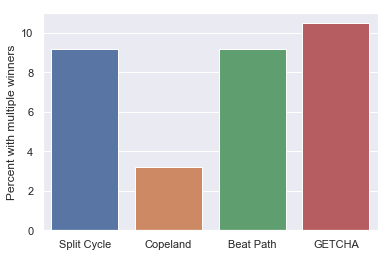

In [5]:
import pandas as pd
import seaborn as sns
sns.set()

df=pd.DataFrame({'voting_method' : ['Split Cycle','Beat Path','Copeland','GETCHA'],
                 'num_mult_winners': [round(float(num_mult_winners['sc'])/num_profiles, 3) * 100,
                                      round(float(num_mult_winners['bp'])/num_profiles, 3) * 100,
                                      round(float(num_mult_winners['copeland'])/num_profiles, 3) * 100,
                                      round(float(num_mult_winners['smith'])/num_profiles, 3) * 100]})
             
ax = sns.barplot(x="voting_method", y="num_mult_winners", data=df, 
                 order=["Split Cycle", "Copeland", "Beat Path", "GETCHA"])
ax.set_xlabel('')
ax.set_ylabel('Percent with multiple winners')
plt.savefig("mult_winners_real_elections")

Text(0,0.5,'')

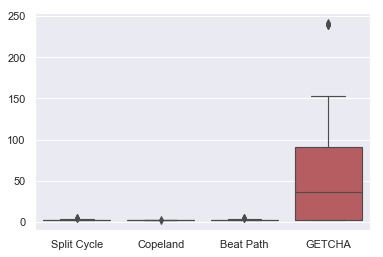

In [6]:
# Plot the sizes of the winning sets as a box ploot

data_ws_size = {"winners":list(), "vm": list()}

data_ws_size["winners"] += winner_set_sizes["sc"]
data_ws_size["vm"] += ["Split Cycle"] * len(winner_set_sizes["sc"])

data_ws_size["winners"] += winner_set_sizes["copeland"]
data_ws_size["vm"] += ["Copeland"] * len(winner_set_sizes["copeland"])

data_ws_size["winners"] += winner_set_sizes["bp"]
data_ws_size["vm"] += ["Beat Path"] * len(winner_set_sizes["bp"])

data_ws_size["winners"] += winner_set_sizes["smith"]
data_ws_size["vm"] += ["GETCHA"] * len(winner_set_sizes["smith"])

df_ws_size = pd.DataFrame.from_dict(data_ws_size)

ax = sns.boxplot(x="vm", y="winners",  data=df_ws_size,  linewidth=1.15)
ax.set_xlabel('')
ax.set_ylabel('')
